ZOMATO ANALYSIS

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv(r'C:\Users\Gokul\Downloads\Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


DATA PREPROCESSING

In [60]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [61]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Converting votes column into float and removing Denominator.

In [62]:
def handle_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handle_rate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [63]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

DATA VISUALIZATION AND ANALYSIS

Category that has highest number of restaurants.

Text(0.5, 0, 'Type of restaurant')

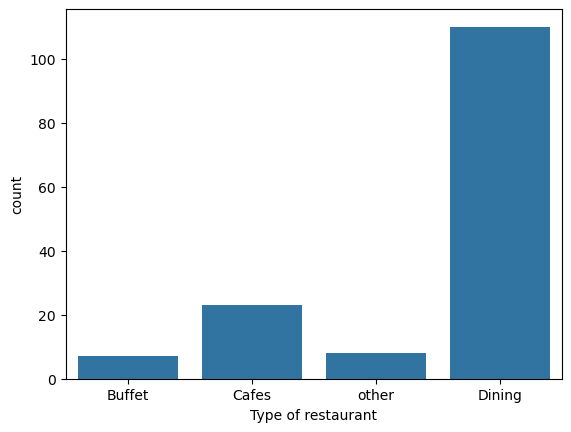

In [64]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

The majority of the restaurants fall into the dining category.

Which type of restaurant do customers prefer the most?

Text(0, 0.5, 'Votes')

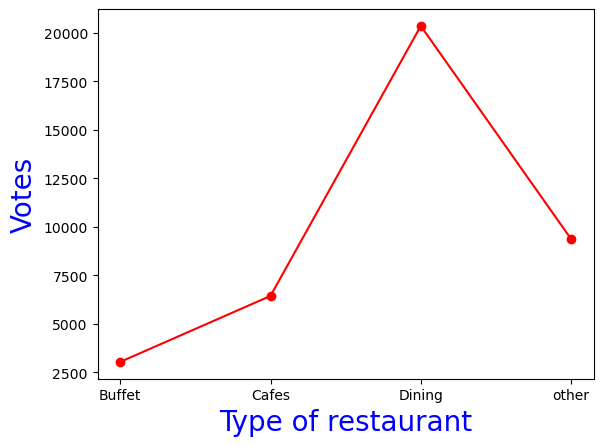

In [65]:
grouped_by_votes=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_by_votes})
plt.plot(result,c='red',marker='o')
plt.xlabel('Type of restaurant',c='blue',size=20)
plt.ylabel('Votes',c='blue',size=20)

Dining restaurants are preferred by a larger number of individuals.

Which restaurant got maximum votes?

In [66]:
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
print("Restaurant with max votes:",restaurant_with_max_votes,sep='\n')

Restaurant with max votes:
38    Empire Restaurant
Name: name, dtype: object


Most preferred method of ordering by customers

<Axes: xlabel='online_order', ylabel='count'>

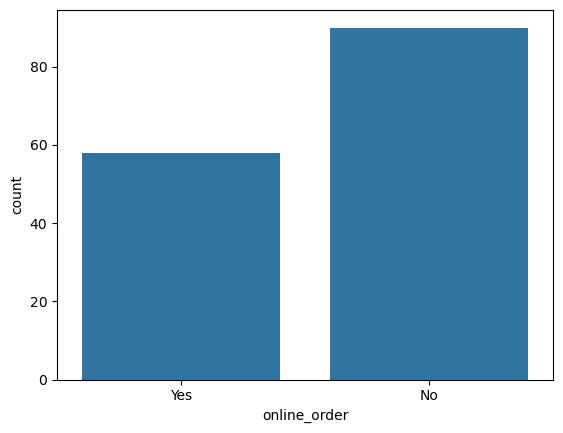

In [67]:
sns.countplot(x=df['online_order'])

Rating distribution

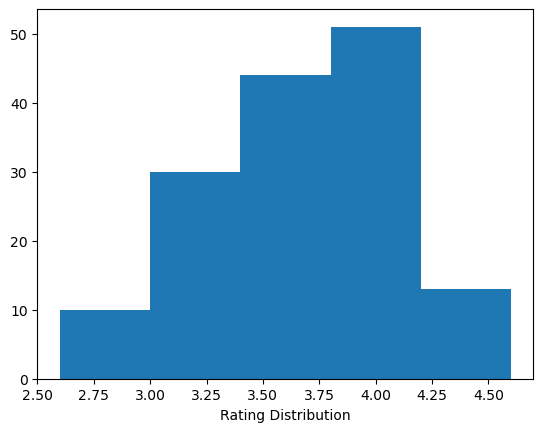

In [68]:
plt.hist(df['rate'],bins=5)
plt.xlabel("Rating Distribution")
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4

Restaurant preference based on cost for 2 people

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

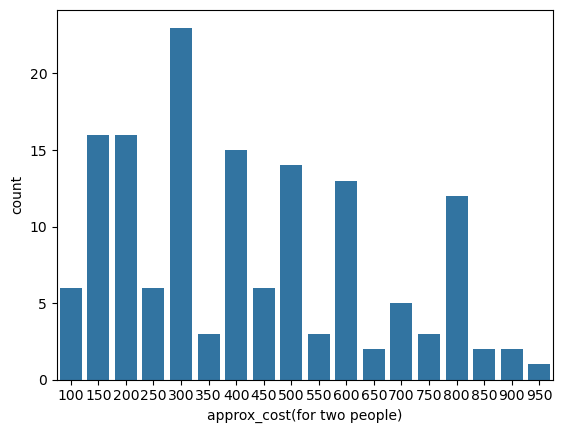

In [69]:
sns.countplot(x=df['approx_cost(for two people)'])

Majority of people prefer restaurant with cost 300 rupees for 2 people.

Rating Comparison between online and offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

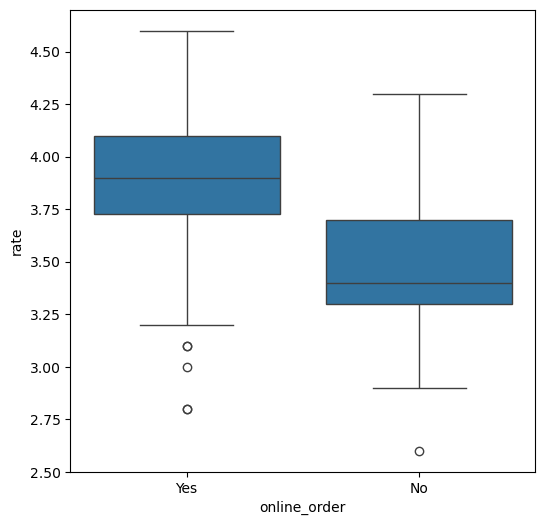

In [70]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Offline orders recieved low ratings comparitively

Method of Ordering prefered by customers by restaurant type.

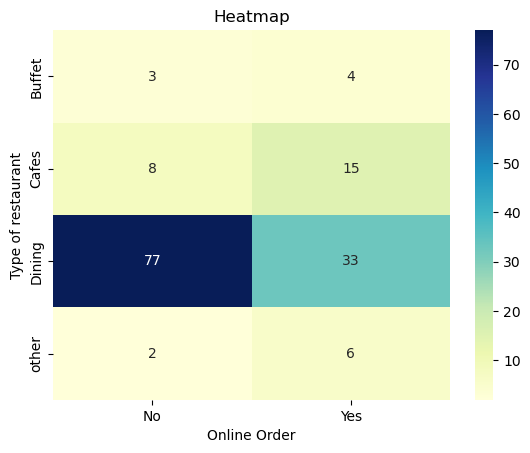

In [71]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Type of restaurant')
plt.show()

Dining restaurants primarily get offline orders,whereas cafes primarily receive online orders. 
This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.